# Tasks for data visualization

   * descriptive analysis 
       * discover distribution
       * discover central tendency
       * discover dispersion
       * discover bivariate distribution via scatterplots
       * build cross-tabulations and contingency tables 

        
   * exploratory data analysis (EDA)
       * compare trends
       * locate outliers
       * browse topology
       * compare shapes  
       * explore hypotheses on data relationships 
       * explore new patterns

Sources:
* [Explore Data and Predict](https://www.kaggle.com/ikarashi/explore-data-and-predict), a notebook 'Why Employees Cause Attrition?' by [Yusuke Ikarashi](https://www.kaggle.com/ikarashi)
* [Modern Pandas (Part 6): Visualization](https://tomaugspurger.github.io/modern-6-visualization.html) 
* [Visualize Machine Learning Data in Python With Pandas](https://machinelearningmastery.com/visualize-machine-learning-data-python-pandas/)


Datasets
* Kaggle Dataset [WA_Fn-UseC_-HR-Employee-Attrition.csv](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/data), data from IBM HR Analytics Employee Attrition & Performance 

In [2]:
% matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# 1. Load data

In [3]:
def read(fp):
    """
    Notes: 
        - Fields Over18, EmployeeCount, EmployeeNumber, StandardHours - seems don't make sense, drop them
        - Fields Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, OverTime - convert to Categorical datatype
    """
    df = (pd.read_csv(fp)
            .drop(["Over18", "EmployeeCount", "EmployeeNumber", "StandardHours"], axis=1)
            .assign(Attrition=lambda x: pd.Categorical(x['Attrition']),
                    BusinessTravel=lambda x: pd.Categorical(x['BusinessTravel']),
                    Department=lambda x: pd.Categorical(x['Department']),
                    EducationField=lambda x: pd.Categorical(x['EducationField']),
                    Gender=lambda x: pd.Categorical(x['Gender']),
                    JobRole=lambda x: pd.Categorical(x['JobRole']),
                    MaritalStatus=lambda x: pd.Categorical(x['MaritalStatus']),
                    OverTime=lambda x: pd.Categorical(x['OverTime'])
                   ))
    return df

In [45]:
df = read("../input/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# select only following columns
extract_cols  = ['Age','JobLevel', 'MonthlyIncome', 
                 'NumCompaniesWorked', 'TotalWorkingYears', 
                 'YearsAtCompany', 'YearsInCurrentRole',
                 'YearsSinceLastPromotion', 'Attrition']

df = df[extract_cols].copy()
df.head()

,Age,JobLevel,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,Attrition
0,41,2,5993,8,8,6,4,0,Yes
1,49,2,5130,1,10,10,7,1,No
2,37,1,2090,6,7,0,0,0,Yes
3,33,1,2909,1,8,8,7,3,No
4,27,1,3468,9,6,2,2,2,No


In [46]:
# get columns numeric and categorical attributes
# details: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.select_dtypes.html 

cols = df.columns
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = cols.drop(num_cols.tolist())

print("Numeric data columns: \n {} \n".format(num_cols.values))
print("Categorical data columns: \n {}".format(cat_cols.values))

Numeric data columns: 
 ['Age' 'JobLevel' 'MonthlyIncome' 'NumCompaniesWorked' 'TotalWorkingYears'
 'YearsAtCompany' 'YearsInCurrentRole' 'YearsSinceLastPromotion'] 

Categorical data columns: 
 ['Attrition']


## Describe data

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.0,5.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.0,40.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.0,5.0,9.0,40.0
YearsInCurrentRole,1470.0,4.229252,3.623137,0.0,2.0,3.0,7.0,18.0
YearsSinceLastPromotion,1470.0,2.187755,3.222430,0.0,0.0,1.0,3.0,15.0


# Discover distribution

### Histograms

* A fast way to get an idea of the distribution of each attribute

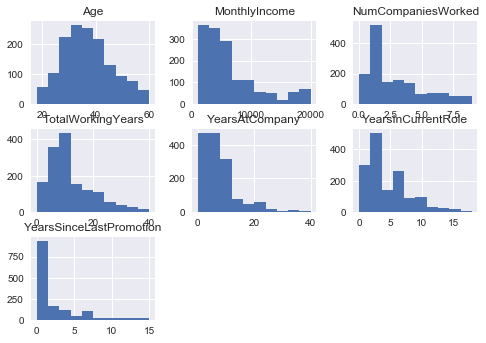

In [93]:
# Univariate Histograms

df[['Age', 'MonthlyIncome', 
   'NumCompaniesWorked', 'TotalWorkingYears', 
   'YearsAtCompany', 'YearsInCurrentRole',
   'YearsSinceLastPromotion']].hist()
plt.show()

Notes: 
* 'Age' attribute may have a Gaussian or nearly Gaussian distribution

### Density plots 

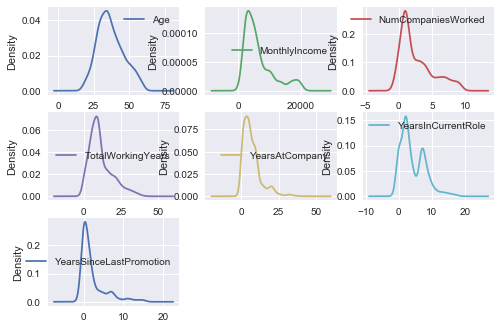

In [94]:
df[['Age', 'MonthlyIncome', 
   'NumCompaniesWorked', 'TotalWorkingYears', 
   'YearsAtCompany', 'YearsInCurrentRole',
   'YearsSinceLastPromotion']].plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

Notes: 
* we can see the distribution for each attribute is clearer than the histograms

# Discover bivariate distributions

### Matplotlib 

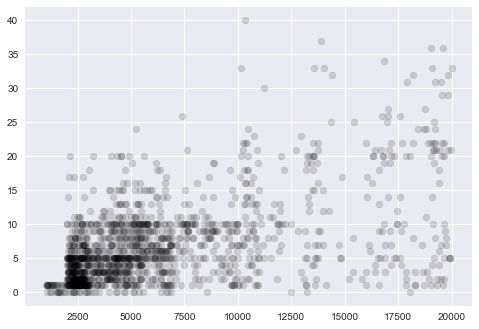

In [48]:
fig, ax = plt.subplots()

ax.scatter(x='MonthlyIncome', y='YearsAtCompany', data=df, c='k', alpha=.15);

### Pandas Built-in Plotting

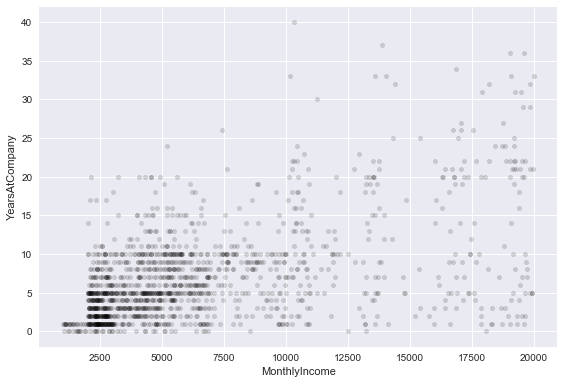

In [49]:
df.plot.scatter(x='MonthlyIncome', y='YearsAtCompany', c='k', alpha=.15)
plt.tight_layout()

### Plotting with Seaborn 

[An introduction to seaborn](http://seaborn.pydata.org/introduction.html#introduction)

Key features: 
* support for numpy and pandas data structures and statistical routines from scipy and statsmodels
* visualizing univariate and bivariate distributions 
* comparing between subsets of data
* fit and visualize linear regression models
* visualize matrices of data and discover structure in those matrices
* plot statistical timeseries data 
* abstractions for structuring grids of plots, easily build complex visualizations


#### Describe distribution of 'YearsAtCompany' data

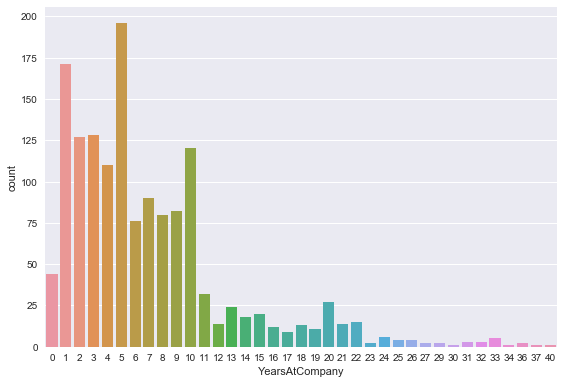

In [50]:
sns.countplot(x='YearsAtCompany', data=df)
sns.despine()
plt.tight_layout()

### Bivariate relationships 

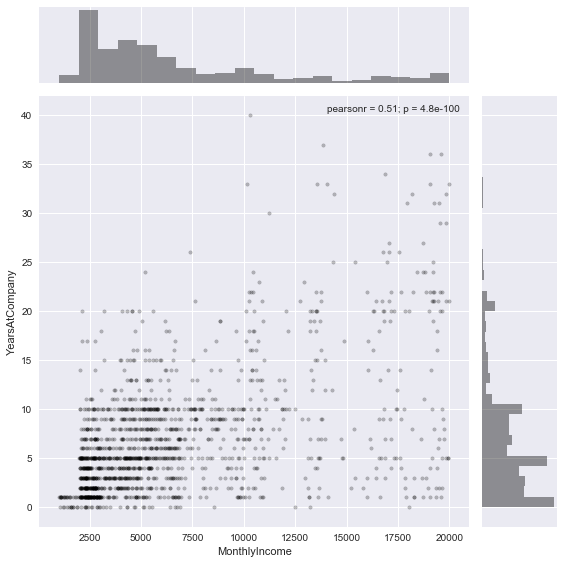

In [51]:
sns.jointplot(x='MonthlyIncome', y='YearsAtCompany', data=df, size=8, alpha=.25,
              color='k', marker='.')
plt.tight_layout()

Or many at once

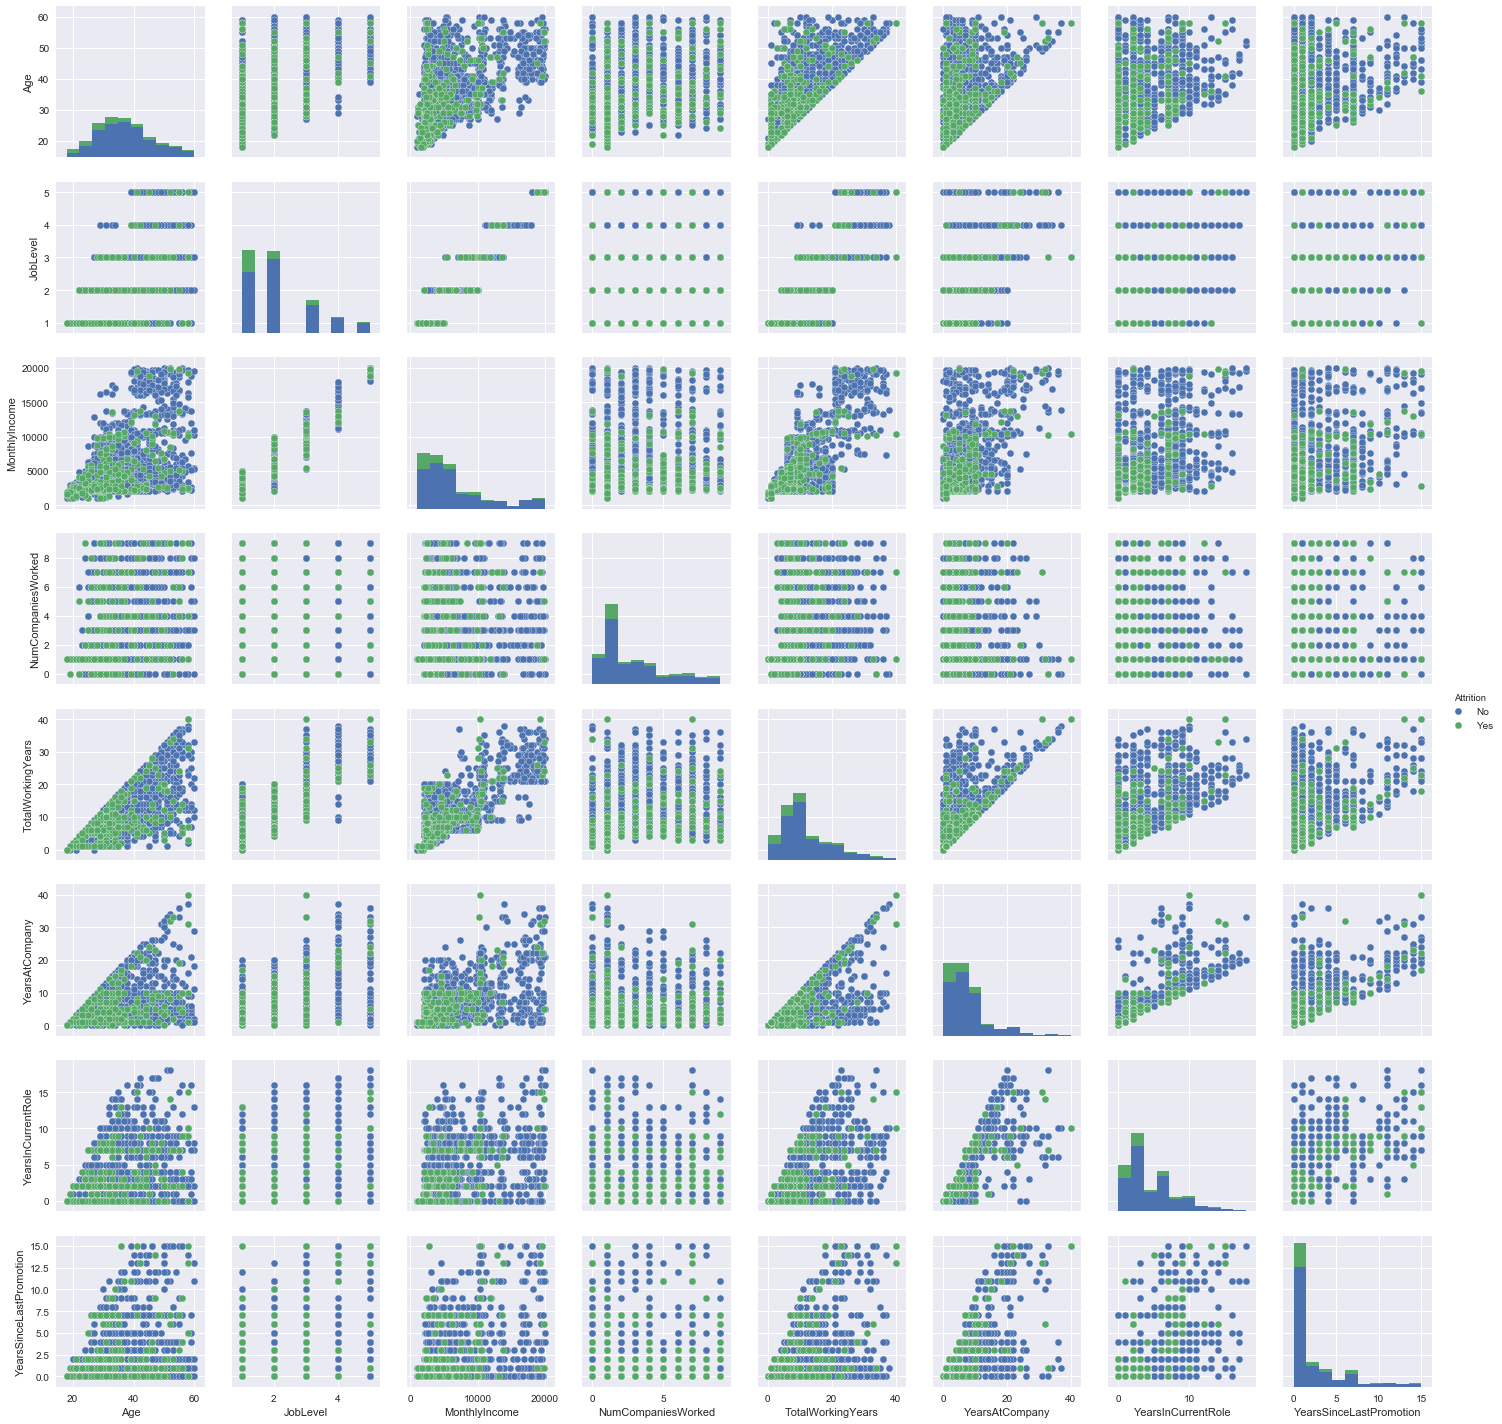

In [52]:
g = sns.pairplot(df, hue='Attrition')

In [56]:
def core(df, α=.01):
    mask = (df > df.quantile(α)).all(1) & (df < df.quantile(1 - α)).all(1)
    return df[mask]

/Users/mnrozhkov/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


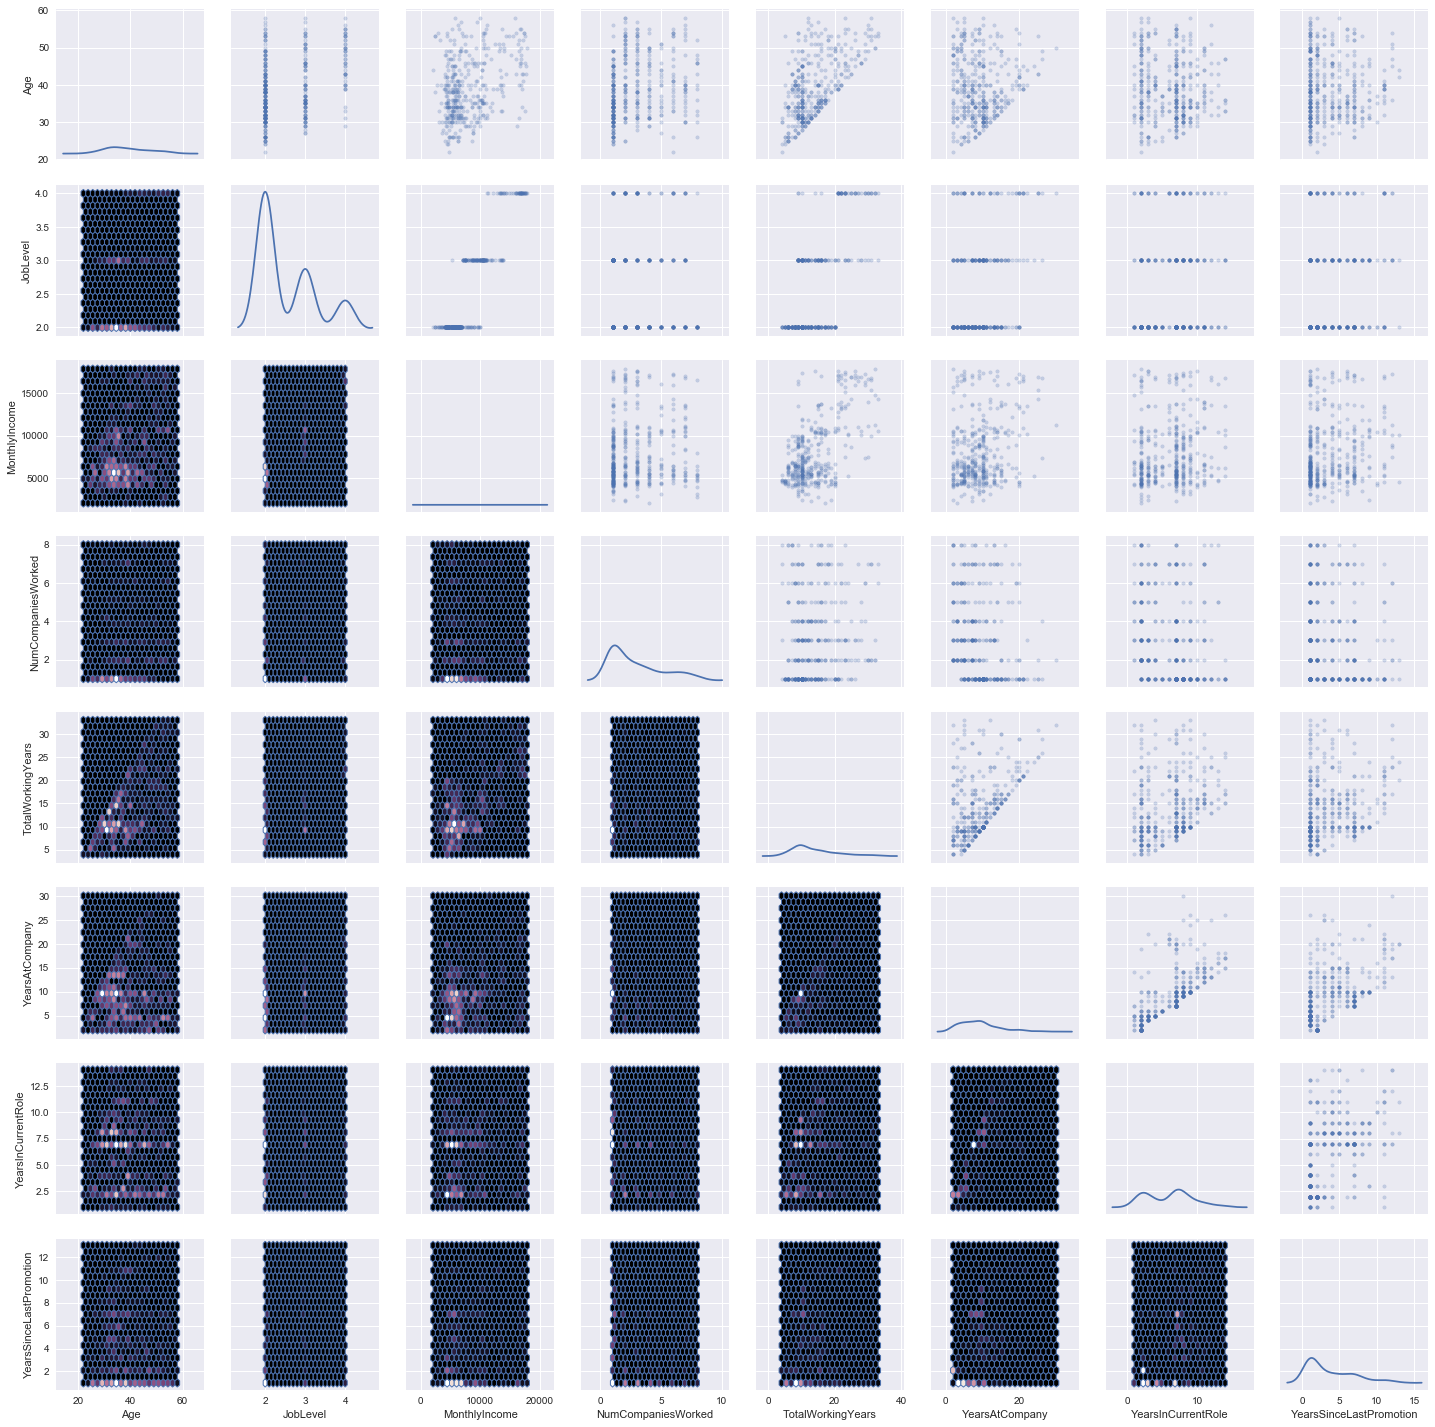

In [60]:
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)

(df.select_dtypes(include=[np.number])
   .pipe(core)
   .pipe(sns.PairGrid)
   .map_upper(plt.scatter, marker='.', alpha=.25)
   .map_diag(sns.kdeplot)
   .map_lower(plt.hexbin, cmap=cmap, gridsize=20)
);

## Explore categorical attributes

In [38]:
df["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

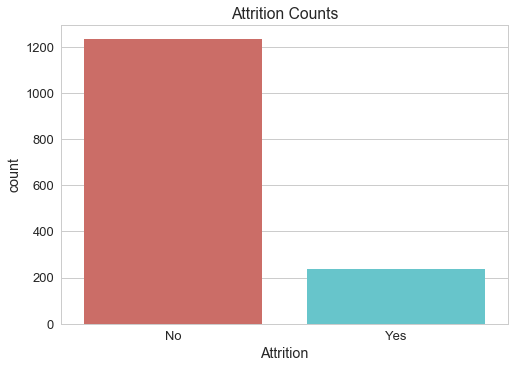

In [39]:
sns.set(style="whitegrid", font_scale=1.3)
sns.countplot(x="Attrition", data=df, palette="hls")
sns.plt.title("Attrition Counts")

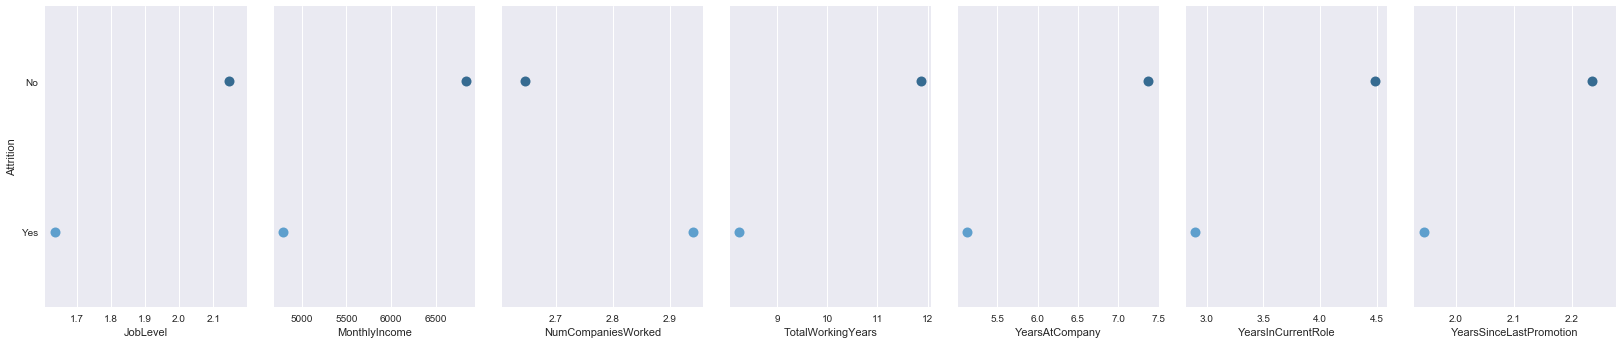

In [65]:
agged = df.groupby(['Attrition']).mean().sort_index().reset_index()

g = sns.PairGrid(agged, x_vars=agged.columns[2:], y_vars=['Attrition'],
                 size=5, aspect=.65)
g.map(sns.stripplot, orient="h", size=10, palette='Blues_d');

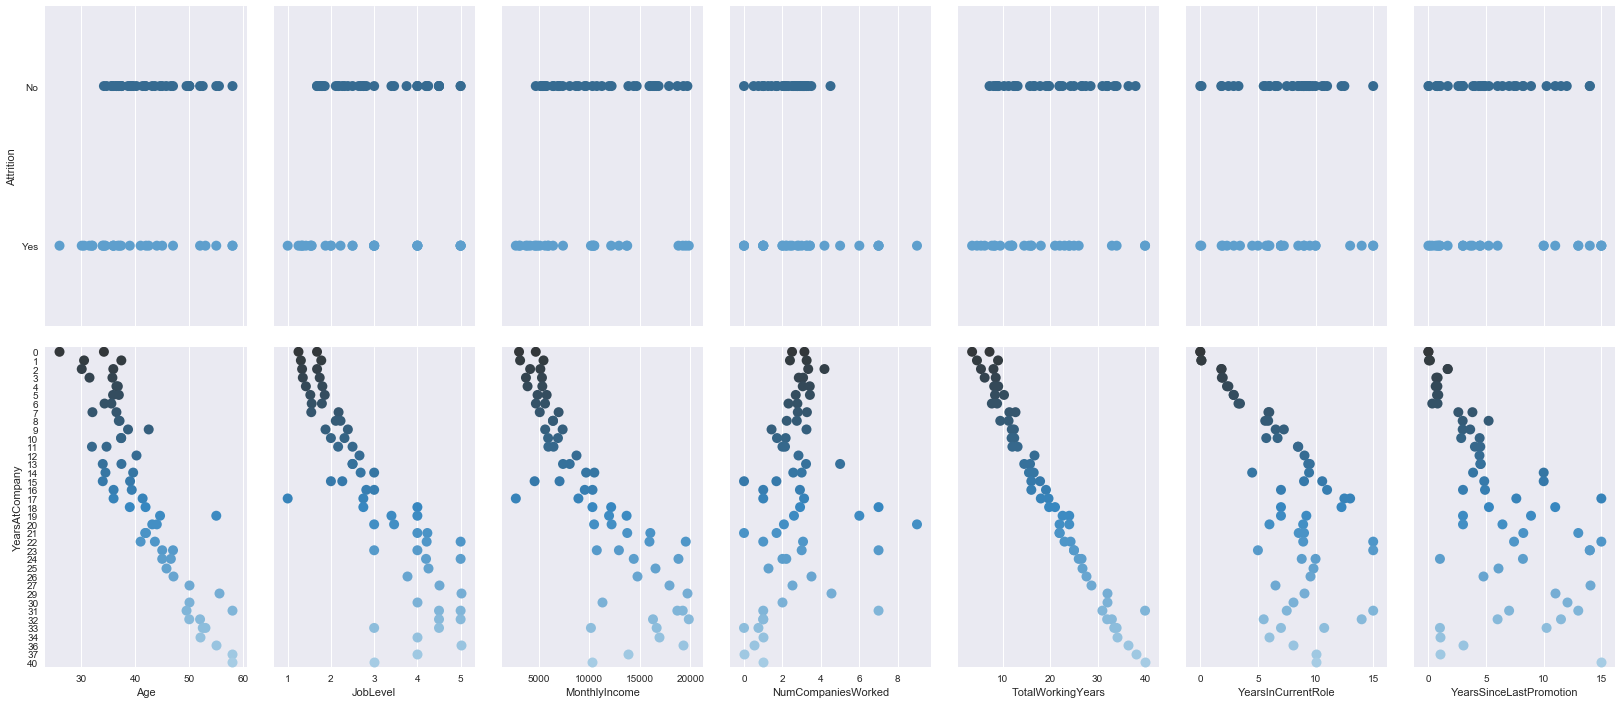

In [66]:
agged = df.groupby(['Attrition', 'YearsAtCompany']).mean().sort_index().reset_index()

g = sns.PairGrid(agged, x_vars=agged.columns[2:], y_vars=['Attrition', 'YearsAtCompany'],
                 size=5, aspect=.65)
g.map(sns.stripplot, orient="h", size=10, palette='Blues_d');

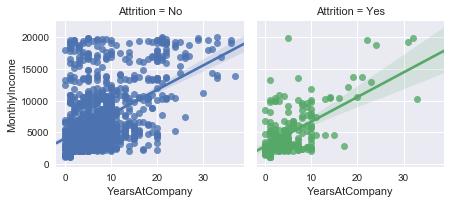

In [81]:
g = sns.FacetGrid(df, col='Attrition', hue='Attrition', col_wrap=4)
g.map(sns.regplot, 'YearsAtCompany', 'MonthlyIncome');

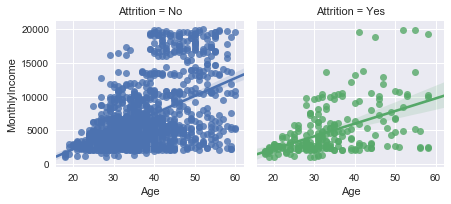

In [82]:
g = sns.FacetGrid(df, col='Attrition', hue='Attrition', col_wrap=4)
g.map(sns.regplot, 'Age', 'MonthlyIncome');

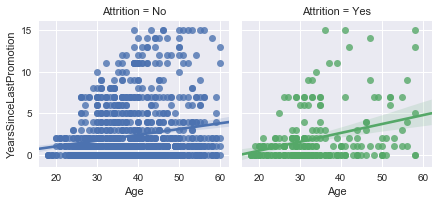

In [83]:
g = sns.FacetGrid(df, col='Attrition', hue='Attrition', col_wrap=4)
g.map(sns.regplot, 'Age', 'YearsSinceLastPromotion');

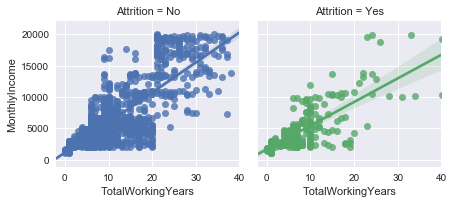

In [86]:
g = sns.FacetGrid(df, col='Attrition', hue='Attrition', col_wrap=4)
g.map(sns.regplot, 'TotalWorkingYears', 'MonthlyIncome');